# Análisis de datos exploratorio

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

##  Explorando el data set postulante_educacion... 

In [13]:
postulantes_educacion = pd.read_csv('data/fiuba_1_postulantes_educacion.csv')

#print('Cantidad Registros, Cantidad atributos')
#postulantes_educacion.shape

#print('Categorias de valores educativos y cantidad de registros')
#postulantes_educacion['nombre'].value_counts()

#print('Categorias de valores educativos y cantidad de registros')
#postulantes_educacion['estado'].value_counts()

#print('Valores null')
#postulantes_educacion.isnull().sum()
#postulantes_educacion.isnull().any()

#postulantes_educacion.info()
columns_rename = {'idpostulante': 'Id postulante', 'nombre': 'Formacion', 'estado': 'Estado formacion'}
postulantes_educacion = postulantes_educacion.rename(columns=columns_rename)
postulantes_educacion.head(10)

#postulantes_educacion.describe(include='all')
#para un mismo id de postulante pueden haber varios registros ejemplo: 
#postulantes_educacion[postulantes_educacion['idpostulante']=='YlMLGD']


,Id postulante,Formacion,Estado formacion
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso
5,Ym2X,Otro,En Curso
6,ZKl5,Master,En Curso
7,EDD99,Terciario/Técnico,En Curso
8,Y043Z,Universitario,En Curso
9,6M3jr,Universitario,En Curso


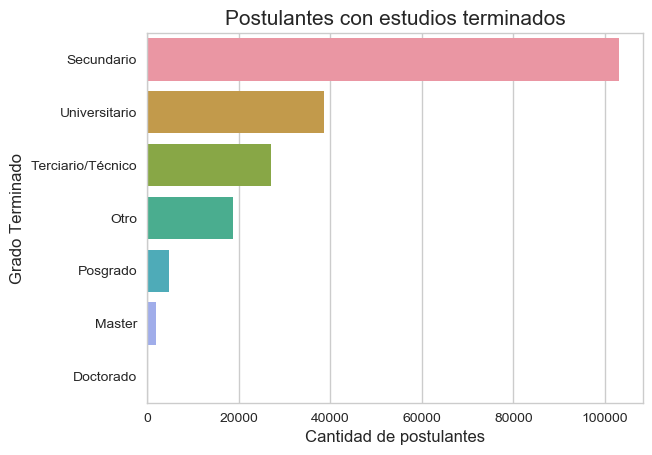

In [17]:
postulantes_estudios_terminados = postulantes_educacion[postulantes_educacion['Estado formacion'] == 'Graduado']['Formacion'].value_counts()
g = sns.barplot(x=postulantes_estudios_terminados.values, y=postulantes_estudios_terminados.index, orient='h')
g.set_title("Postulantes con estudios terminados", fontsize=15)
g.set_xlabel("Cantidad de postulantes", fontsize=12)
g.set_ylabel("Grado Terminado", fontsize=12)

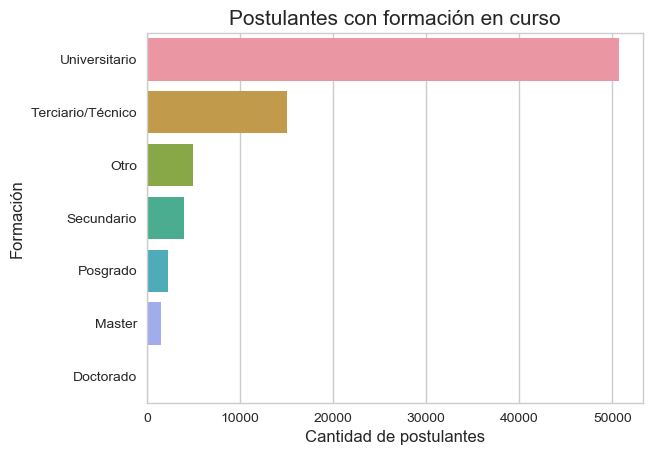

In [18]:
postulantes_estudios_en_curso = postulantes_educacion[postulantes_educacion['Estado formacion'] == 'En Curso']['Formacion'].value_counts()
g = sns.barplot(x=postulantes_estudios_en_curso.values, y=postulantes_estudios_en_curso.index, orient='h')
g.set_title("Postulantes con formación en curso", fontsize=15)
g.set_xlabel("Cantidad de postulantes", fontsize=12)
g.set_ylabel("Formación", fontsize=12)

In [19]:
for_heatmap = postulantes_educacion.pivot_table(index='Formacion', columns='Estado formacion', values='Id postulante', aggfunc='count')
print(for_heatmap)

Estado formacion   Abandonado  En Curso  Graduado
Formacion                                        
Doctorado                  15        94       105
Master                    144      1519      1935
Otro                      947      4919     18882
Posgrado                  317      2239      4831
Secundario               3156      3995    103105
Terciario/Técnico        5692     15032     27009
Universitario           14955     50733     38607


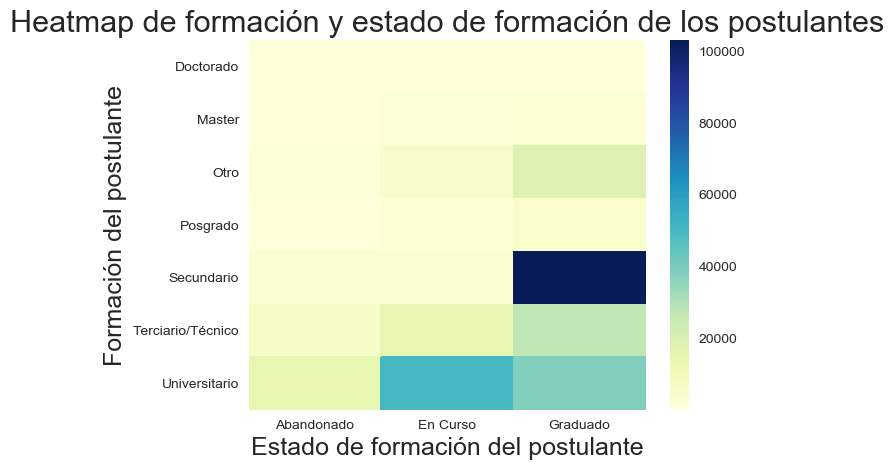

In [23]:
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de formación y estado de formación de los postulantes", fontsize=22)
g.set_xlabel("Estado de formación del postulante",fontsize=18)
g.set_ylabel("Formación del postulante", fontsize=18)

Tener en cuenta que estas visualizaciones muestran solamente tendencias un poco cuestionables... porque el data set no esta bien estructurado. Hay id duplicados y parece que lo que representa este data set son las actualizaciones de los datos de formacion de cada postulante. Inclusive hay algunos casos en donde para *un mismo id* tenemos las siguientes 3 observaciones:

- Universitario En Curso
- Universitario Terminado
- Universitario Abandonado

Se podría buscar el máximo nivel educativo por postulante y visualizar esos datos del mismo modo que arriba, pero pienso que no tiene mucho sentido puesto que tendría más sentido tener una entidad (dataset) que sea: formacion de posutlante en postulaciones (tener el estado del nivel educativo de cada postulante por cada postulacion realizada) y obtener ese heatmap con los datos de cada postulacion. 

# # Explorando el dataset postulantes_genero_y_edad

In [142]:
postulantes_genero_edad = pd.read_csv('data/fiuba_2_postulantes_genero_y_edad.csv')

#print('Cantidad Registros, Cantidad atributos')
#postulantes_genero_edad.shape
#postulantes_genero_edad.head(10)

#print('Cantidad de observaciones por sexo')
#postulantes_genero_edad['sexo'].value_counts()

#print('Valores null')
#postulantes_genero_edad.isnull().sum()
#postulantes_genero_edad.isnull().any()

#postulantes_genero_edad.info()
columns_rename = {'idpostulante': 'Id postulante', 'fechanacimiento': 'Fecha nacimiento', 'sexo': 'Sexo'}
postulantes_genero_edad = postulantes_genero_edad.rename(columns=columns_rename)
postulantes_genero_edad.head(10)


postulantes_genero_edad.describe(include='all')
#hay fechas nulas y lo peor: fechas con dstintos formatos


,Id postulante,Fecha nacimiento,Sexo
count,200888,196138,200888
unique,200888,15027,3
top,Er5boo,1991-06-20,FEM
freq,1,57,101981


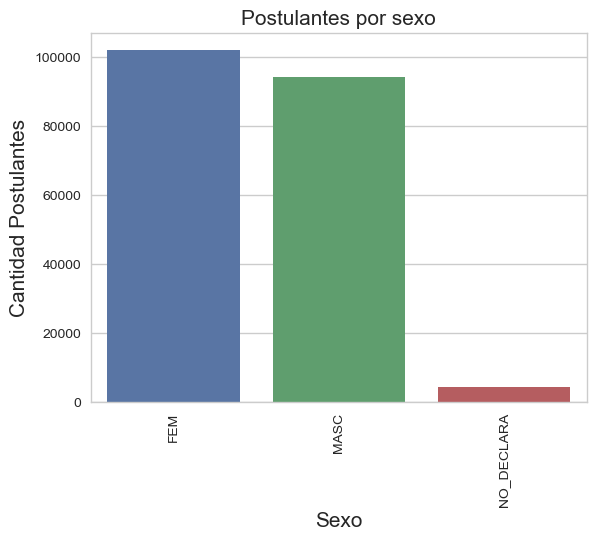

In [26]:
g = sns.countplot(x='Sexo', data=postulantes_genero_edad, order=postulantes_genero_edad['Sexo'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Sexo", fontsize=15)
g.set_ylabel("Cantidad Postulantes", fontsize=15)
g.set_title("Postulantes por sexo", fontsize=15)

In [47]:
def get_year_of_birth(postulantes_genero_edad):
    return (pd.to_datetime
            (postulantes_genero_edad['Fecha nacimiento'], errors='coerce', format='%Y-%m-%d')
            .dt.year)

def get_age(yearOfBirth):
    return 2018 - yearOfBirth
    
def get_age_range(yearOfBirth):
    age = get_age(yearOfBirth)
    if(age<18): return 'Menor de 18'
    if(age<=25): return 'Entre 18 y 25'
    if(age<=30): return 'Entre 26 y 30'
    if(age<=35): return 'Entre 31 y 35'
    if(age<=40): return 'Entre 36 y 40'
    if(age<=45): return 'Entre 41 y 45'
    if(age<=50): return 'Entre 46 y 50'
    return 'Mayor de 50'

postulantes_genero_edad['Año nacimiento']=get_year_of_birth(postulantes_genero_edad)
postulantes_genero_edad['Edad']=postulantes_genero_edad['Año nacimiento'].map(get_age, na_action=None)
postulantes_genero_edad['Rango edad']=postulantes_genero_edad['Año nacimiento'].map(get_age_range, na_action=None)
columns_order = ['Id postulante', 'Sexo', 'Fecha nacimiento', 'Edad', 'Rango edad']

postulantes_genero_edad = postulantes_genero_edad[columns_order]
postulantes_genero_edad.head(10)

,Id postulante,Sexo,Fecha nacimiento,Edad,Rango edad
0,NM5M,FEM,1970-12-03,48.0,Entre 46 y 50
1,5awk,FEM,1962-12-04,56.0,Mayor de 50
2,ZaO5,FEM,1978-08-10,40.0,Entre 36 y 40
3,NdJl,MASC,1969-05-09,49.0,Entre 46 y 50
4,eo2p,MASC,1981-02-16,37.0,Entre 36 y 40
5,Ez8J,MASC,1968-12-18,50.0,Entre 46 y 50
6,aOQq,MASC,1966-07-16,52.0,Mayor de 50
7,8BkL,FEM,1976-07-21,42.0,Entre 41 y 45
8,1d2B,MASC,1976-02-28,42.0,Entre 41 y 45
9,NPBx,MASC,1981-03-09,37.0,Entre 36 y 40


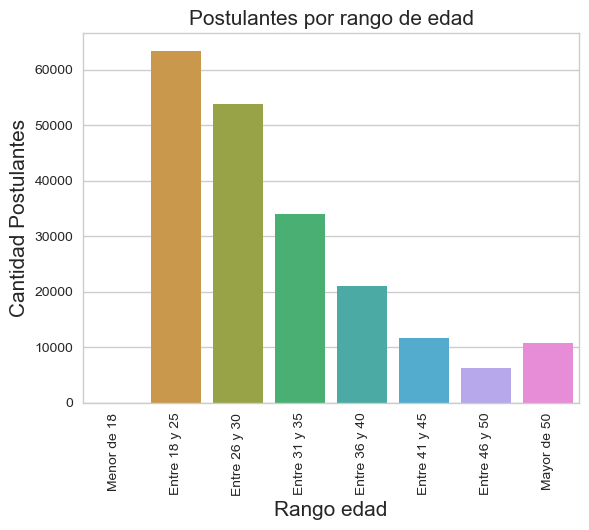

In [60]:
order_x = ['Menor de 18', 'Entre 18 y 25', 'Entre 26 y 30', 'Entre 31 y 35', 'Entre 36 y 40', 'Entre 41 y 45', 'Entre 46 y 50', 'Mayor de 50']
g = sns.countplot(x='Rango edad', data=postulantes_genero_edad, order=order_x, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Rango edad", fontsize=15)
g.set_ylabel("Cantidad Postulantes", fontsize=15)
g.set_title("Postulantes por rango de edad", fontsize=15)

In [51]:
#Para chusmear los rangos de edad y el sexo
pd.crosstab(postulantes_genero_edad['Rango edad'], postulantes_genero_edad['Sexo'])

Sexo,FEM,MASC,NO_DECLARA
Rango edad,,,
Entre 18 y 25,36569,26643,148
Entre 26 y 30,29094,24651,99
Entre 31 y 35,16469,17374,75
Entre 36 y 40,9692,11378,50
Entre 41 y 45,5062,6496,25
Entre 46 y 50,2671,3643,24
Mayor de 50,2424,4153,4147
Menor de 18,0,1,0


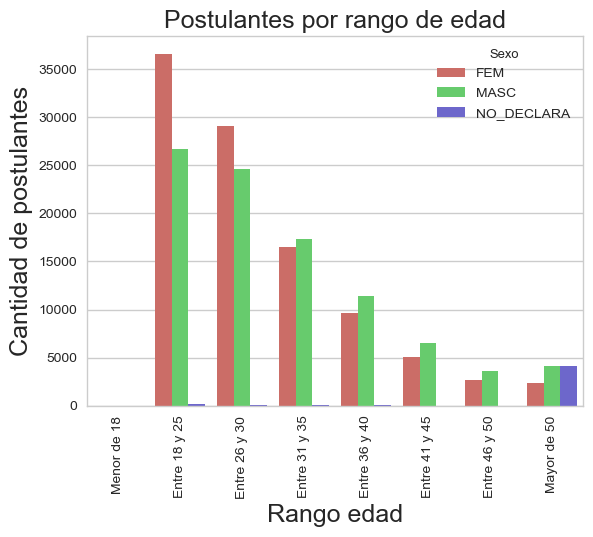

In [63]:
g = sns.countplot(x="Rango edad", hue="Sexo", data=postulantes_genero_edad, order=order_x, palette="hls")
g.set_title("Postulantes por rango de edad", fontsize=18)
g.set_xlabel("Rango edad", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_ylabel("Cantidad de postulantes", fontsize=18)

Las únicas observaciones son sobre el campo *fecha de nacimiento* que tiene los siguientes problemas no resueltos
- Hay diferentes formatos (y-m-d, d-m-y). Como esta ahora se puso valores nulos en el formato minoritario. Se tendrian que rescatar esos valores
- Hay dos outliers (uno que nacio en el 1700 y otro que es menor de 18 años)

# # Explorando el dataset vistas

In [4]:
vistas = pd.read_csv('data/fiuba_3_vistas.csv')

#print('Cantidad Registros, Cantidad atributos')
vistas.shape

#print('Categorias de valores educativos y cantidad de registros')
vistas['idAviso'].value_counts()

#print('Valores null')
vistas.isnull().sum()
#vistas.isnull().any()

vistas.info()
columns_rename = {'idpostulante': 'Id postulante', 'idAviso': 'Id aviso', 'timestamp': 'Timestamp'}
vistas = vistas.rename(columns=columns_rename)
vistas.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


,Id aviso,Timestamp,Id postulante
961887,1112282241,2018-02-28T23:58:53.714-0500,zval0XJ
961888,1112344915,2018-02-28T23:58:54.764-0500,KBAd6Vj
961889,1112312221,2018-02-28T23:58:56.832-0500,KBAlAe2
961890,1112369686,2018-02-28T23:59:00.761-0500,EzO6we2
961891,1112368896,2018-02-28T23:59:05.750-0500,LNMlrLj
961892,1112366944,2018-02-28T23:59:08.772-0500,MVPj3AK
961893,1001442844,2018-02-28T23:59:37.000-0500,VNrYP6m
961894,1112362644,2018-02-28T23:59:46.181-0500,owzLD43
961895,1112305277,2018-02-28T23:59:52.754-0500,A3DraY1
961896,1112345900,2018-02-28T23:59:55.409-0500,ekmNzBW


In [117]:
dayTranslation = {'Monday':'Lunes', 'Tuesday': 'Martes', 'Wednesday':'Miercoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sabado', 'Sunday':'Domingo'}

def get_day_moment(timestamp):
    hour = timestamp.hour
    if(hour>=7 and hour<=11): return 'Mañana'
    if(hour>11 and hour<16): return 'Mediodia'
    if(hour>=16 and hour<20): return 'Tarde'
    if((hour>=20 and hour<=23) or (hour>=0 and hour<4)): return 'Noche'
    return 'Madrugada'

vistas['Timestamp']=pd.to_datetime(vistas['Timestamp'])
vistas['Mes'] = vistas['Timestamp'].dt.month
vistas['Año'] = vistas['Timestamp'].dt.year
vistas['Franja horaria'] = vistas['Timestamp'].map(get_day_moment)
vistas['Dia semana'] = (vistas['Timestamp'].dt.weekday_name).map(lambda x: dayTranslation[x])
vistas['Dia'] = vistas['Timestamp'].dt.day
vistas['Timestamp'].min()
vistas['Timestamp'].max()

Timestamp('2018-03-01 04:59:56.812000')

In [76]:
vistas['Año'].value_counts()

2018    961897
Name: Año, dtype: int64

In [77]:
vistas['Mes'].value_counts()

2    921074
3     40823
Name: Mes, dtype: int64

In [111]:
vistas['Dia semana'].value_counts() 

Martes       232145
Lunes        227957
Miercoles    227160
Sabado        95930
Domingo       90646
Viernes       47236
Jueves        40823
Name: Dia semana, dtype: int64

In [112]:
vistas['Dia'].value_counts() 

27    232145
26    227957
28    227160
24     95930
25     90646
23     47236
1      40823
Name: Dia, dtype: int64

In [94]:
vistas['Franja horaria'].value_counts()

Noche        382209
Mediodia     241090
Tarde        226901
Mañana        69995
Madrugada     41702
Name: Franja horaria, dtype: int64

In [118]:
pd.crosstab(vistas['Dia'], vistas['Franja horaria'])

Franja horaria,Madrugada,Mañana,Mediodia,Noche,Tarde
Dia,,,,,
1,4737,0,0,36086,0
23,0,0,0,32947,14289
24,3940,8609,26628,35980,20773
25,4351,5847,24531,34903,21014
26,8391,17459,66540,76344,59223
27,9832,17978,62326,84590,57419
28,10451,20102,61065,81359,54183


Son las vistas que realizaron postulantes en una semana: 23 Febrero al 1 Marzo inclusive

In [138]:
order_x = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
order_y = ['Madrugada', 'Noche', 'Tarde', 'Mediodia', 'Mañana']
vistas['Franja horaria'] = pd.Categorical(vistas['Franja horaria'], order_y)
vistas['Dia semana'] = pd.Categorical(vistas['Dia semana'], order_x)
vistas.sort_values(['Dia semana', 'Franja horaria'])
for_heatmap = vistas.pivot_table(index='Franja horaria', columns='Dia semana', values='Id aviso', aggfunc='count')
#for_heatmap.sortlevel(level=0, inplace=True)
for_heatmap

Dia semana,Domingo,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado
Franja horaria,,,,,,,
Madrugada,4351.0,8391.0,9832.0,10451.0,4737.0,NaN,3940.0
Noche,34903.0,76344.0,84590.0,81359.0,36086.0,32947.0,35980.0
Tarde,21014.0,59223.0,57419.0,54183.0,NaN,14289.0,20773.0
Mediodia,24531.0,66540.0,62326.0,61065.0,NaN,NaN,26628.0
Mañana,5847.0,17459.0,17978.0,20102.0,NaN,NaN,8609.0


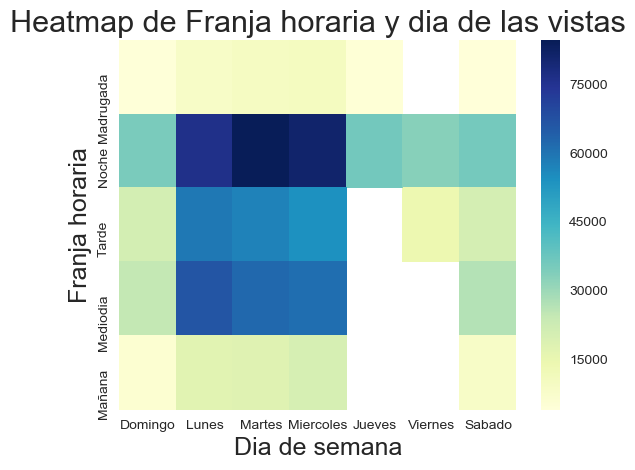

In [140]:

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de Franja horaria y dia de las vistas", fontsize=22)
g.set_xlabel("Dia de semana",fontsize=18)
g.set_ylabel("Franja horaria", fontsize=18)

# # Explorando el dataset postulaciones

In [5]:
postulaciones = pd.read_csv('data/fiuba_4_postulaciones.csv')

#print('Cantidad Registros, Cantidad atributos')
postulaciones.shape

#print('Categorias de valores educativos y cantidad de registros')
#postulaciones['idAviso'].value_counts()

#print('Valores null')
#postulaciones.isnull().sum()
#postulaciones.isnull().any()

#postulaciones.info()
#columns_rename = {'idpostulante': 'Id postulante', 'idAviso': 'Id aviso', 'fechapostulacion': 'Fecha postulacion'}
#postulaciones = postulaciones.rename(columns=columns_rename)
postulaciones.tail(10)


,idaviso,idpostulante,fechapostulacion
3401613,1112334662,1QPMbX3,2018-02-28 23:56:53
3401614,1112354320,1QPMbX3,2018-02-28 23:57:22
3401615,1112360579,1QPMbX3,2018-02-28 23:58:32
3401616,1112359520,1QPMbX3,2018-02-28 23:59:34
3401617,1112344822,0zPa0eq,2018-02-28 23:49:46
3401618,1111753681,0zPa0eq,2018-02-28 23:54:44
3401619,1112369306,2zP6Jd0,2018-02-28 23:57:43
3401620,1112308651,8MPoxDW,2018-02-28 23:52:13
3401621,1112341128,8MPoxDW,2018-02-28 23:59:06
3401622,1112369825,2zP6J9V,2018-02-28 23:56:10


In [158]:
dayTranslation = {'Monday':'Lunes', 'Tuesday': 'Martes', 'Wednesday':'Miercoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sabado', 'Sunday':'Domingo'}

def get_day_moment(timestamp):
    hour = timestamp.hour
    if(hour>=7 and hour<=11): return 'Mañana'
    if(hour>11 and hour<16): return 'Mediodia'
    if(hour>=16 and hour<20): return 'Tarde'
    if((hour>=20 and hour<=23) or (hour>=0 and hour<4)): return 'Noche'
    return 'Madrugada'

postulaciones['Fecha postulacion']=pd.to_datetime(postulaciones['Fecha postulacion'])
postulaciones['Mes'] = postulaciones['Fecha postulacion'].dt.month
postulaciones['Año'] = postulaciones['Fecha postulacion'].dt.year
postulaciones['Franja horaria'] = postulaciones['Fecha postulacion'].map(get_day_moment)
postulaciones['Dia semana'] = (postulaciones['Fecha postulacion'].dt.weekday_name).map(lambda x: dayTranslation[x])
postulaciones['Dia'] = postulaciones['Fecha postulacion'].dt.day
postulaciones['Fecha postulacion'].min()
postulaciones['Fecha postulacion'].max()

Timestamp('2018-02-28 23:59:55')

In [153]:
postulaciones['Año'].value_counts()

2018    3401623
Name: Año, dtype: int64

In [154]:
postulaciones['Mes'].value_counts()

2    2125425
1    1276198
Name: Mes, dtype: int64

In [156]:
postulaciones['Franja horaria'].value_counts()

Mañana       1170186
Mediodia      853558
Tarde         656442
Noche         546111
Madrugada     175326
Name: Franja horaria, dtype: int64

In [157]:
postulaciones['Dia semana'].value_counts()

Miercoles    677836
Lunes        668310
Martes       658428
Jueves       506163
Viernes      446698
Domingo      226857
Sabado       217331
Name: Dia semana, dtype: int64

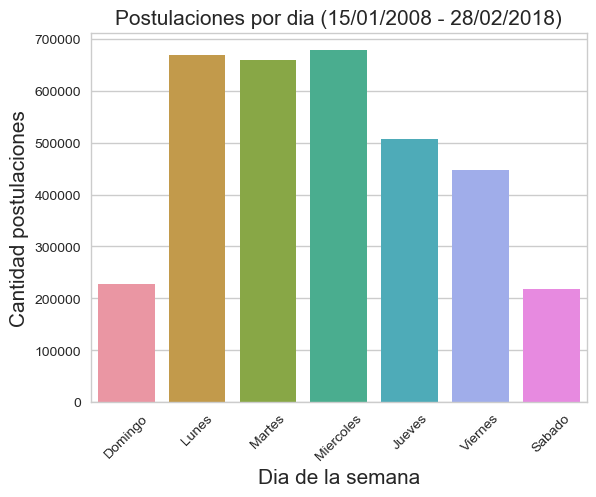

In [161]:
order_x = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
g = sns.countplot(x='Dia semana', data=postulaciones, order=order_x, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Dia de la semana", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones por dia (15/01/2008 - 28/02/2018)", fontsize=15)

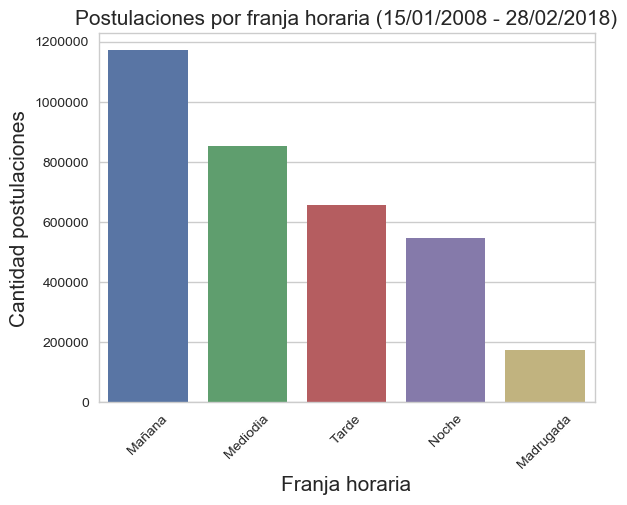

In [165]:
order_x = ['Mañana', 'Mediodia', 'Tarde', 'Noche', 'Madrugada']
g = sns.countplot(x='Franja horaria', data=postulaciones, order=order_x, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Franja horaria", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones por franja horaria (15/01/2008 - 28/02/2018)", fontsize=15)

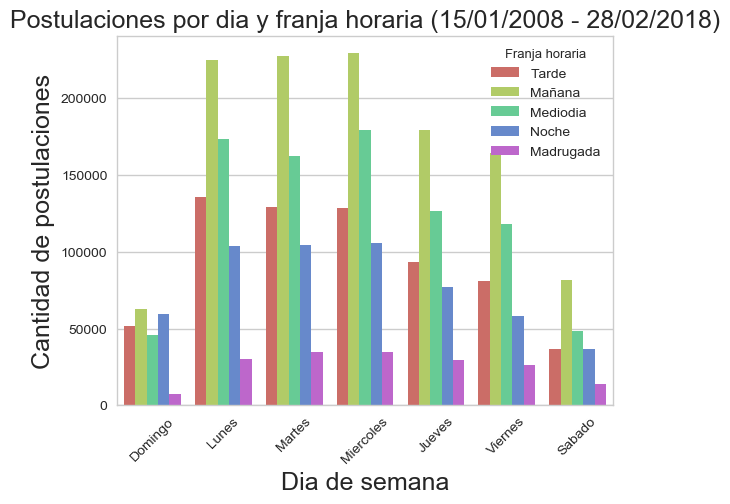

In [168]:
order_x = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
g = sns.countplot(x="Dia semana", hue="Franja horaria", data=postulaciones, order=order_x, palette="hls")
g.set_title("Postulaciones por dia y franja horaria (15/01/2008 - 28/02/2018)", fontsize=18)
g.set_xlabel("Dia de semana", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)

# Explorando el dataset Avisos Online

In [8]:
avisosOnline = pd.read_csv('data/fiuba_5_avisos_online.csv')

#print('Cantidad Registros, Cantidad atributos')
print(avisosOnline.shape)

#print('Categorias de valores educativos y cantidad de registros')
#avisosOnline['idAviso'].value_counts()

#print('Valores null')
#avisosOnline.isnull().sum()
#avisosOnline.isnull().any()

#avisosOnline.info()
avisosOnline.tail(10)

(5028, 1)


,idaviso
5018,1112387914
5019,1112388054
5020,1112387925
5021,1112386257
5022,1112387944
5023,1112387966
5024,1112383275
5025,1112388199
5026,1112388376
5027,1112387833


In [9]:
avisosDetalle = pd.read_csv('data/fiuba_6_avisos_detalle.csv')

#print('Cantidad Registros, Cantidad atributos')
print(avisosDetalle.shape)

#print('Categorias de valores educativos y cantidad de registros')
#avisosDetalle['idAviso'].value_counts()

#print('Valores null')
#avisosDetalle.isnull().sum()
#avisosDetalle.isnull().any()

#avisosDetalle.info()
avisosDetalle.tail(10)

(13534, 11)


,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
13524,1112342193,1,Supervisor de Mantenimiento,"<p>Nuestro cliente, un importante PYME dedicad...",Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Mantenimiento,VF CONSULTING
13525,1112342444,1,Vendedor Telefónico / Telemarketer / Call Center,<p>UNOMOTOS Concesionaria líder en el rubro de...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,UNOMOTOS
13526,1112342462,1,Analista de Comercio Exterior(Pilar),"<p>Importante Empresa Alimenticia, del Parque ...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Compras Internacionales/Importación,BAYTON
13527,1112342487,1,Técnico para operación y detección en equipos ...,<p>Importante empresa de servicios para obras ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Construcción,CIMA S.A.
13528,1112342500,1,RESPONSABLE DE DISEÑO Y DESARROLLO,"<p style=""""><span style="""">Para Importante Emp...",Capital Federal,NaN,Panamericana 35.7,Full-time,Senior / Semi-Senior,Diseño,Cometto SA
13529,1112342505,1,Vendedor de Salon -- UNOMOTOS,<p>UNOMOTOS Concesionaria líder en el rubro de...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,UNOMOTOS
13530,1112342513,1,OPERADOR DE ENSAYOS NO DESTRUCTIVOS,<p><strong>RECONOCIDA EMPRESA DE MONTAJES INDU...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ingeniería Oficina Técnica / Proyecto,Grupo Consultor
13531,1112342456,1,Back officer Junior de Fondos Comunes de Inver...,"<p>BNP Paribas Investment Partners, importante...",Gran Buenos Aires,NaN,NaN,Full-time,Junior,Contabilidad,BNP PARIBAS ARGENTINA INVESTMENT PARTNERS S A
13532,1112342496,1,Asistente Administrativo,"<p>Somos un joven grupo gastronómico, que se e...",Gran Buenos Aires,NaN,NaN,Full-time,Gerencia / Alta Gerencia / Dirección,Administración,Cerveteca Odin Srl
13533,1112342432,1,Ingeniero para coordinación de obras de canali...,<p>Importante empresa de servicios para obras ...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Construcción,CIMA S.A.
